# 1. Data Analysis

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df = pd.read_csv('Credit_card.csv')

In [235]:
label = pd.read_csv('Credit_card_label.csv')

In [236]:
df = df.merge(label, on = 'Ind_ID', how= 'left')

In [237]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [239]:
df.duplicated().sum()

0

In [240]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [241]:
df.drop(columns= ['Type_Occupation'],inplace= True)

In [242]:
df.dropna(inplace= True)


In [243]:
df.isna().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

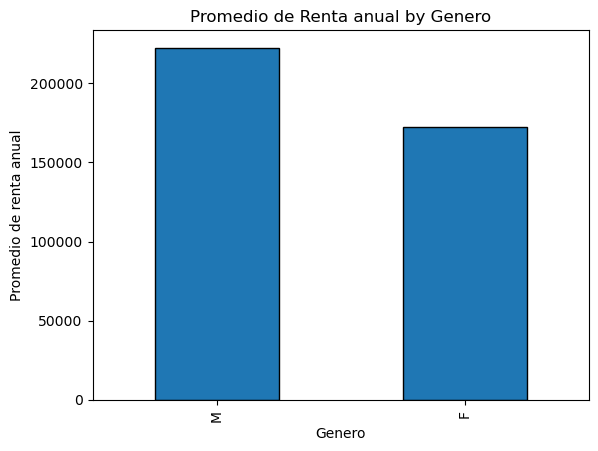

In [244]:
df.groupby('GENDER')['Annual_income'].mean().sort_values(ascending=False).plot(kind='bar', edgecolor='black')
plt.title('Promedio de Renta anual by Genero')
plt.xlabel('Genero')
plt.ylabel('Promedio de renta anual')
plt.show()

In [245]:
label_counts= df['label'].value_counts()
label_counts

label
0    1336
1     160
Name: count, dtype: int64

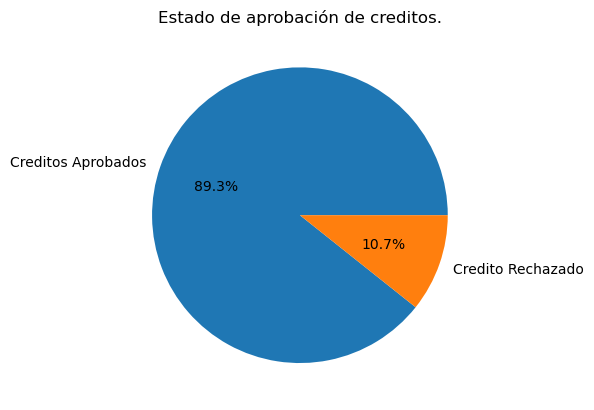

In [246]:
plt.pie(label_counts, labels = ['Creditos Aprobados', 'Credito Rechazado'], autopct='%1.1f%%')
plt.title('Estado de aprobación de creditos.')
plt.show()

In [247]:
df.groupby('Type_Income')['Annual_income'].mean()

Type_Income
Commercial associate    233880.169972
Pensioner               154964.866795
State servant           210130.434783
Working                 180154.579974
Name: Annual_income, dtype: float64

In [248]:
df.groupby('Marital_status')['Employed_days'].max()

Marital_status
Civil marriage          365243
Married                 365243
Separated               365243
Single / not married    365243
Widow                   365243
Name: Employed_days, dtype: int64

In [249]:
df.groupby('Housing_type')['Family_Members'].sum()

Housing_type
Co-op apartment           5
House / apartment      2900
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            175
Name: Family_Members, dtype: int64

In [250]:
df.groupby('GENDER')['Birthday_count'].min() * -1

GENDER
F    24946.0
M    24662.0
Name: Birthday_count, dtype: float64

In [251]:
df.groupby('Propert_Owner')['Annual_income'].mean()

Propert_Owner
N    183343.352601
Y    194722.899181
Name: Annual_income, dtype: float64

In [252]:
df.groupby('CHILDREN')['Annual_income'].sum()

CHILDREN
0     191703172.5
1      64218600.0
2      26226900.0
3       2845800.0
4        180000.0
14       225000.0
Name: Annual_income, dtype: float64

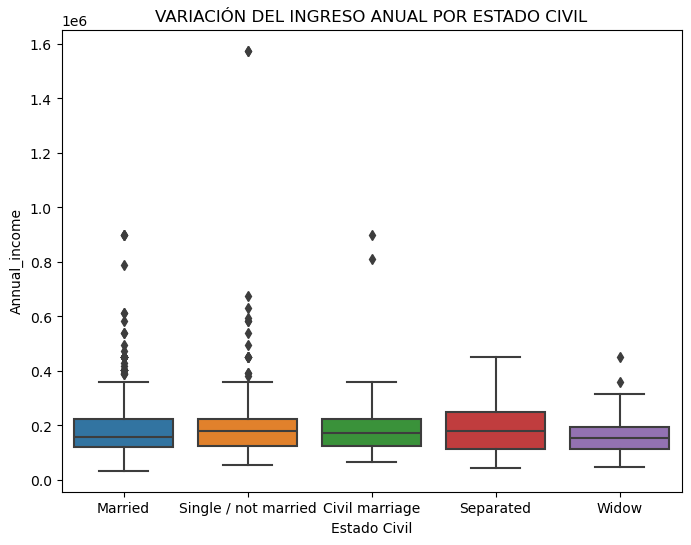

In [253]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'Marital_status', y='Annual_income', data=df)
plt.title('VARIACIÓN DEL INGRESO ANUAL POR ESTADO CIVIL')
plt.xlabel('Estado Civil')
plt.show()

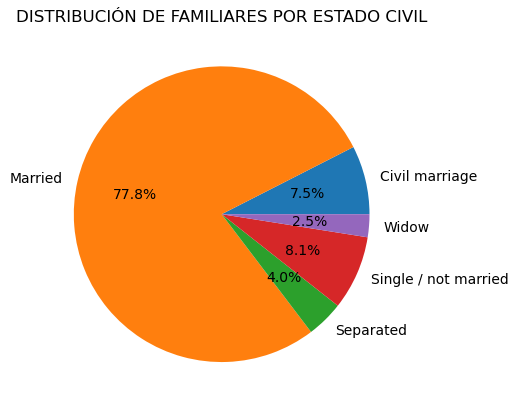

In [254]:
df.groupby('Marital_status')['Family_Members'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('DISTRIBUCIÓN DE FAMILIARES POR ESTADO CIVIL')
plt.ylabel('')
plt.show()

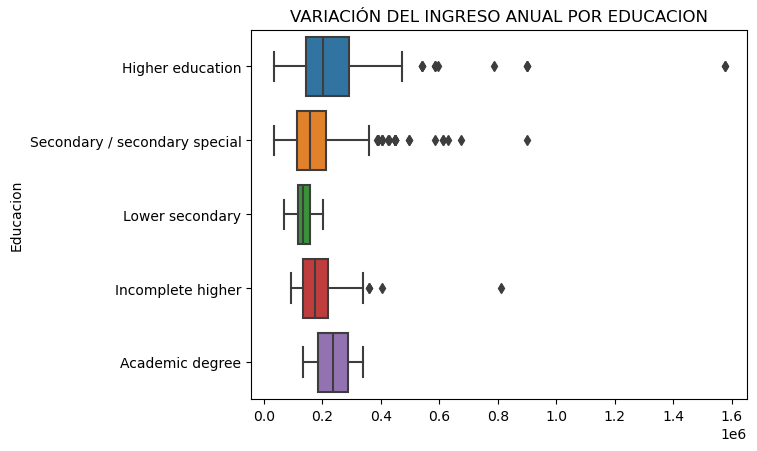

In [255]:
sns.boxplot(x= 'Annual_income', y='EDUCATION', data=df)
plt.title('VARIACIÓN DEL INGRESO ANUAL POR EDUCACION')
plt.xlabel('')
plt.ylabel('Educacion')
plt.show()

# 2. Feature Engineering

In [256]:
df.head(3)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,2,1


In [257]:
data = df[['Car_Owner', 'Propert_Owner','Annual_income','EDUCATION','label']]

In [258]:
data.head(3)

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,Y,Y,180000.0,Higher education,1
1,Y,N,315000.0,Higher education,1
4,Y,N,315000.0,Higher education,1


In [259]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [260]:
data['Car_Owner'] = labelencoder.fit_transform(data['Car_Owner'])

C:\Users\pauli\AppData\Local\Temp\ipykernel_15400\929256704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Car_Owner'] = labelencoder.fit_transform(data['Car_Owner'])


In [261]:
data['Propert_Owner'] = labelencoder.fit_transform(data['Propert_Owner'])
data['EDUCATION'] = labelencoder.fit_transform(data['EDUCATION'])

C:\Users\pauli\AppData\Local\Temp\ipykernel_15400\1995655673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Propert_Owner'] = labelencoder.fit_transform(data['Propert_Owner'])
C:\Users\pauli\AppData\Local\Temp\ipykernel_15400\1995655673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EDUCATION'] = labelencoder.fit_transform(data['EDUCATION'])


In [262]:
data

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,1,1,180000.0,1,1
1,1,0,315000.0,1,1
4,1,0,315000.0,1,1
6,1,0,315000.0,1,1
7,0,0,180000.0,4,1
...,...,...,...,...,...
1542,1,0,360000.0,4,0
1544,0,0,225000.0,2,0
1545,1,1,180000.0,1,0
1546,1,0,270000.0,4,0


In [263]:
X = data.iloc[:, : -1]

In [264]:
y = data.iloc[:, -1]

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)


In [266]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [267]:
from sklearn.metrics import accuracy_score

def modelperformance(predictions):
    print('Acurracy Score on model is {}'.format(accuracy_score(y_test, predictions)))

# 3. Machine Learning

### LogisticRegression

In [268]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [269]:
log_predictions = log_model.predict(scaled_X_test)

In [270]:
modelperformance(log_predictions)

Acurracy Score on model is 0.91


In [271]:
from sklearn.model_selection import GridSearchCV

### KNeighborsClassifier

In [272]:
from sklearn.neighbors import KNeighborsClassifier
param_grid_kn = {'n_neighbors': [4,5,6,7,8,9], 
              'weights': ['uniform', 'distance'],
              'algorithm': [ 'auto','kd_tree']}

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid_kn, cv=2)

In [273]:
gridkn.fit(scaled_X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [274]:
gridkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}

In [275]:
kn_predictions = gridkn.predict(scaled_X_test)

In [276]:
modelperformance(kn_predictions)

Acurracy Score on model is 0.91


### Clasificador de Vectores de Soporte (SVC)

In [277]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svr = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

In [278]:
grid_search = GridSearchCV(svm, param_grid_svr)

In [279]:
grid_search.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['rbf', 'linear', 'poly']})

In [280]:
grid_search.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [281]:
svm_predictions = grid_search.predict(scaled_X_test)
modelperformance(svm_predictions)

Acurracy Score on model is 0.91


### DecisionTreeClassifier

In [282]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion':  ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid= param_grid)

In [283]:
grid_search_tree.fit(scaled_X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [284]:
grid_search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [285]:
preds_tree = grid_search_tree.predict(scaled_X_test)
modelperformance(preds_tree)

Acurracy Score on model is 0.8966666666666666


<!-- ### AdaBoostClassifier -->

In [291]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}
ada_grid_search = GridSearchCV(ada_classifier, ada_param_grid, cv= 2)

In [287]:
ada_grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]})

In [288]:
ada_grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [289]:
preds_ada = ada_grid_search.predict(scaled_X_test)

In [290]:
modelperformance(preds_ada)

Acurracy Score on model is 0.91
